In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px

In [11]:
lightning_info = pd.read_csv("./Raw_data/eda_dataset_cleaning/Files/eda_outliers_dataset1.csv")
lightning_info.head(10) 

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229
5,2015,37894191
6,2014,34919173
7,2013,27600898
8,2012,28807552
9,2011,31392058


In [12]:
def formating_numbs(num):
    """This function will take a number and if 
    is higher than a Million it will add an M at the end,
    if is lower than Million will add a K.
    """
    
    if num >= 1e6: 
        s = f"{num*1e-6:1.1f}M"
    else:
        s = f"{num*1e-3:1.0f}K"
        
    return s


print(formating_numbs(45000))

45K


In [13]:
lightning_info["Readable_num_strikes"] = lightning_info["number_of_strikes"].apply(formating_numbs)
lightning_info.head(15)

,year,number_of_strikes,Readable_num_strikes
0,2020,15620068,15.6M
1,2019,209166,209K
2,2018,44600989,44.6M
3,2017,35095195,35.1M
4,2016,41582229,41.6M
5,2015,37894191,37.9M
6,2014,34919173,34.9M
7,2013,27600898,27.6M
8,2012,28807552,28.8M
9,2011,31392058,31.4M


In [14]:
lightning_info = lightning_info.sort_values(by = "number_of_strikes",ascending= False)
lightning_info

,year,number_of_strikes,Readable_num_strikes
2,2018,44600989,44.6M
4,2016,41582229,41.6M
16,2004,40023951,40.0M
17,2003,39092327,39.1M
15,2005,38168699,38.2M
5,2015,37894191,37.9M
3,2017,35095195,35.1M
6,2014,34919173,34.9M
14,2006,33292382,33.3M
9,2011,31392058,31.4M


In [15]:
lightning_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 2 to 1
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  34 non-null     int64 
 1   number_of_strikes     34 non-null     int64 
 2   Readable_num_strikes  34 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [16]:
# Now one good way to check outliers is to review central Tendency measures like mean and median

print(f"Mean: {formating_numbs(np.mean(lightning_info["number_of_strikes"]))}")
print(f"Median: {formating_numbs(np.median(lightning_info["number_of_strikes"]))}")

Mean: 26.8M
Median: 28.3M


C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_8320\2743430268.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box.set_xticklabels( np.array([ formating_numbs(label) for label in g.get_xticks()]))


[Text(-10000000.0, 0, '-10000K'),
 Text(0.0, 0, '0K'),
 Text(10000000.0, 0, '10.0M'),
 Text(20000000.0, 0, '20.0M'),
 Text(30000000.0, 0, '30.0M'),
 Text(40000000.0, 0, '40.0M'),
 Text(50000000.0, 0, '50.0M')]

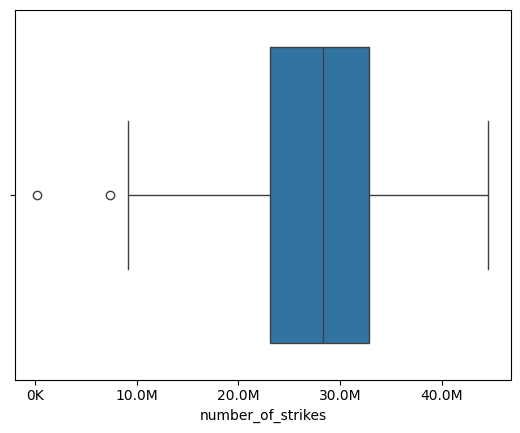

In [24]:
box = sns.boxplot(
    data= lightning_info,
    x= "number_of_strikes",
)

g = plt.gca()
box.set_xticklabels( np.array([ formating_numbs(label) for label in g.get_xticks()])) 

***
### Outliers

As a general rule in statistics, any data point that falls beyond 1.5 times the blu boxes are considered outliers

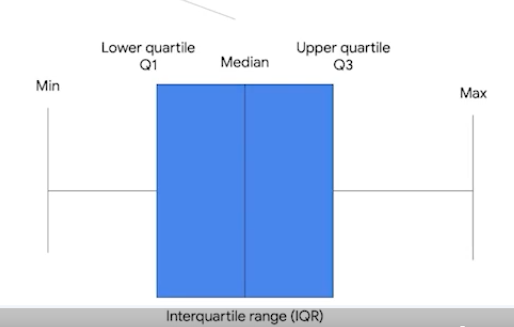

In [27]:
q1 = lightning_info["number_of_strikes"].quantile(0.25)
q3 = lightning_info["number_of_strikes"].quantile(0.75)

print(formating_numbs(q1), "\n", formating_numbs(q3))

23.1M 
 32.8M


In [32]:
iqr = q3 - q1 # Inter Quartile Range
print(formating_numbs(iqr))

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

print(formating_numbs(upper_limit))
print(formating_numbs(lower_limit))

9.7M
47.4M
8.6M


In [31]:
lightning_outliers = lightning_info[ (lightning_info["number_of_strikes"] < lower_limit) | (lightning_info["number_of_strikes"] > upper_limit)]

lightning_outliers

,year,number_of_strikes,Readable_num_strikes
33,1987,7378836,7.4M
1,2019,209166,209K


In [40]:
def add_labels(x,y):
    for i in range(len(x)): plt.text(x[i] - 0.5, y[i] + 0.05, s = formating_numbs(y[i]))

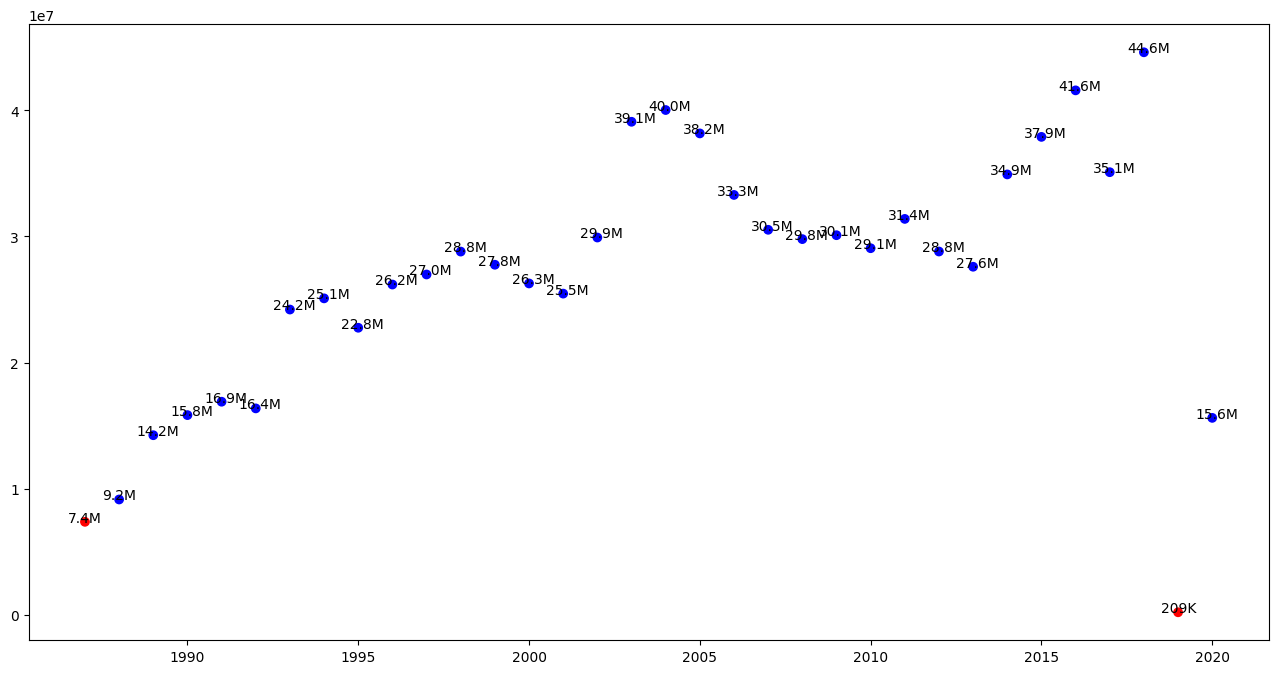

In [41]:
colors = np.where((lightning_info["number_of_strikes"] < lower_limit) | (lightning_info["number_of_strikes"] > upper_limit), "r","b")

fig, ax= plt.subplots(figsize = (16,8))
ax.scatter(lightning_info["year"],lightning_info["number_of_strikes"], c = colors)
add_labels(lightning_info["year"],lightning_info["number_of_strikes"])
plt.show()